<a href="https://colab.research.google.com/github/Msuban1/Msuban1.github.io/blob/main/WEEK_1_Project_(Exploring_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe

In [2]:
!pip install --upgrade gspread gspread-dataframe google-auth

# **Data Exploration**


In [3]:
# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [5]:
# Open Google Sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1kojKp5JqJS7O9LgK1t3E5ZtjuYGm95Qx2R7DetCVfXs/edit?usp=sharing'
spreadsheet = gc.open_by_url(sheet_url)

# Load the first worksheet (cleaned data)
worksheet = spreadsheet.get_worksheet(0)
sales_df = get_as_dataframe(worksheet, dtype=str)
sales_df.dropna(how='all', inplace=True)

# Convert numeric columns
sales_df['Price'] = pd.to_numeric(sales_df['Price'], errors='coerce')
sales_df['Quantity'] = pd.to_numeric(sales_df['Quantity'], errors='coerce')
sales_df['Total_Amount'] = pd.to_numeric(sales_df['Total_Amount'], errors='coerce')

# Create or open the Exploratory Data Analysis sheet
try:
    new_sheet = spreadsheet.add_worksheet(title="Exploratory Data Analysis", rows="100", cols="20")
    print("New sheet 'Exploratory Data Analysis' created.")
except:
    new_sheet = spreadsheet.worksheet("Exploratory Data Analysis")
    print("Using existing sheet 'Exploratory Data Analysis'.")

# Get first 5 rows
display(sales_df.head())

# Check data types
print("\nColumn Data Types:")
print(sales_df.dtypes)

# Identify column types
numerical_columns = sales_df.select_dtypes(include='number').columns.tolist()
categorical_columns = sales_df.select_dtypes(include='object').columns.tolist()

print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Using existing sheet 'Exploratory Data Analysis'.


,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800,Credit Card,North
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200,Cash,South
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100,PayPal,West
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500,Debit Card,East
4,1005,2024-02-08,C005,Book,Books,3,20,60,Credit Card,North



Column Data Types:
Transaction_ID    object
Date              object
Customer_ID       object
Product           object
Category          object
Quantity           int64
Price              int64
Total_Amount       int64
Payment_Method    object
Region            object
dtype: object

Numerical Columns: ['Quantity', 'Price', 'Total_Amount']
Categorical Columns: ['Transaction_ID', 'Date', 'Customer_ID', 'Product', 'Category', 'Payment_Method', 'Region']


### **Identify Key Trends and Patterns**

Now the dataset has been subjected to their types, we are now going to look into calculating summary statistics (e.g., mean,
median, standard deviation for numerical columns). Looking for obvious patterns in sales, seasonality, or product trends.

In [12]:
# Summary statistics (mean, median, std, min, max)
summary_stats = sales_df[['Quantity', 'Price', 'Total_Amount']].describe().T
summary_stats['median'] = sales_df[['Quantity', 'Price', 'Total_Amount']].median()
summary_stats['std'] = sales_df[['Quantity', 'Price', 'Total_Amount']].std()
summary_stats = summary_stats[['mean', 'median', 'std', 'min', 'max']]

# Displaying patterns in notebook
print("Summary Statistics:\n", summary_stats)
print("\nQuick Observations:")
print(f"- Most quantities are low (mean: {sales_df['Quantity'].mean():.2f})")
print(f"- Price range is wide: £{sales_df['Price'].min()} to £{sales_df['Price'].max()}")
print(f"- High variation in Total Sales: std = £{sales_df['Total_Amount'].std():.2f}")

# Reset index for Google Sheets
summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Statistic'}, inplace=True)

# Write to Google Sheets (row 25, column 1)
from gspread_dataframe import set_with_dataframe
set_with_dataframe(new_sheet, pd.DataFrame([["--- Summary Stats (Mean, Median, Std, Min, Max) ---"]]), row=25, col=1)
set_with_dataframe(new_sheet, summary_stats, row=26, col=1)

print("Summary stats written to 'Exploratory Data Analysis' tab on Google Sheets.")


Summary Statistics:
                 mean  median         std   min     max
Quantity        1.55     1.0    0.887041   1.0     4.0
Price         325.50   200.0  302.484884  20.0   800.0
Total_Amount  396.50   200.0  390.418466  25.0  1200.0

Quick Observations:
- Most quantities are low (mean: 1.55)
- Price range is wide: £20 to £800
- High variation in Total Sales: std = £390.42
Summary stats written to 'Exploratory Data Analysis' tab on Google Sheets.


### **Find Correlations from Dataset**

Correlation Matrix:
              Quantity     Price  Total_Amount
Quantity      1.000000 -0.423792     -0.199315
Price        -0.423792  1.000000      0.892401
Total_Amount -0.199315  0.892401      1.000000


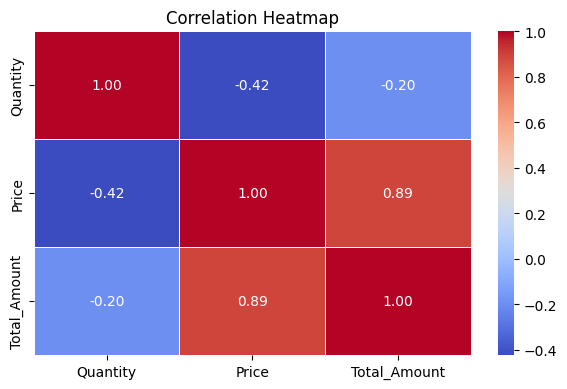

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# Import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = sales_df[['Quantity', 'Price', 'Total_Amount']].corr()

# Display the matrix in text form
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap for visualisation
plt.figure(figsize=(6, 4))  # Set plot size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()